Presented By:

Mehdi Zadeh 

Resume Pages:
https://www.linkedin.com/in/mehdihabibzadeh/

Email: 
Zadeh1980mehdi@gmail.com



In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# %tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras 

In [5]:
tf.__version__

'2.7.0'

In [6]:
mnist = keras.datasets.mnist

In [7]:
data = mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [ ]:
data[0][0].shape, data[0][1].shape, data[1][0].shape, data[1][1].shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train, y_train, X_test, y_test = data[0][0], data[0][1], data[1][0], data[1][1]
X_train = X_train / 255
X_test = X_test / 255
class_names = [str(i) for i in range(10)]
idx = np.arange(len(X_train))
np.random.seed(42)
np.random.shuffle(idx)
X_train, y_train, X_valid, y_valid = X_train[:-10000], y_train[:-10000], X_train[-10000:], y_train[-10000:]

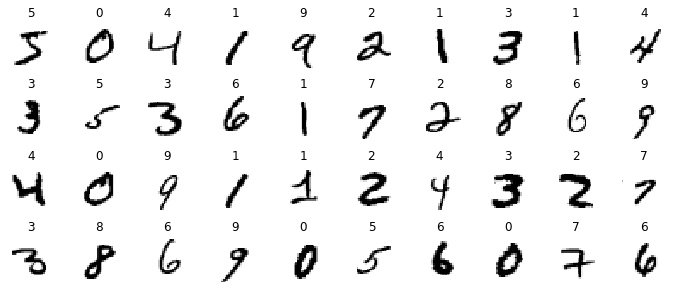

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 10)                90        
Total params: 6,514
Trainable params: 6,514
Non-trainable params: 0
_________________________________________________________________


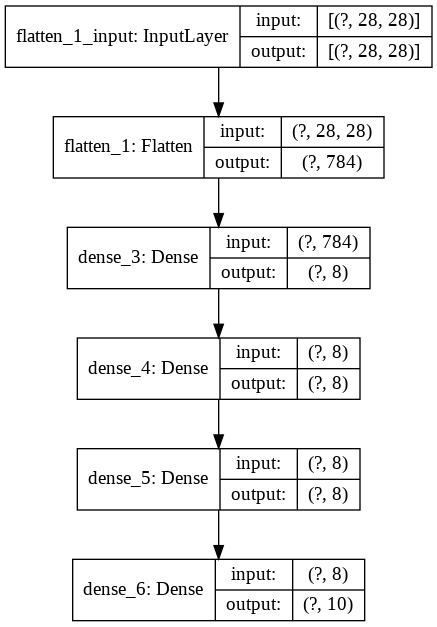

In [ ]:
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [ ]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [ ]:
h = model.fit(X_train, y_train, batch_size=16, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
3125/3125 [==============================] - 5s 1ms/step - loss: 0.7453 - sparse_categorical_accuracy: 0.7746 - val_loss: 0.3657 - val_sparse_categorical_accuracy: 0.8993
Epoch 2/10
3125/3125 [==============================] - 5s 1ms/step - loss: 0.3739 - sparse_categorical_accuracy: 0.8959 - val_loss: 0.3258 - val_sparse_categorical_accuracy: 0.9043
Epoch 3/10
3125/3125 [==============================] - 4s 1ms/step - loss: 0.3205 - sparse_categorical_accuracy: 0.9093 - val_loss: 0.2895 - val_sparse_categorical_accuracy: 0.9188
Epoch 4/10
3125/3125 [==============================] - 5s 1ms/step - loss: 0.2930 - sparse_categorical_accuracy: 0.9171 - val_loss: 0.2573 - val_sparse_categorical_accuracy: 0.9256
Epoch 5/10
3125/3125 [==============================] - 4s 1ms/step - loss: 0.2763 - sparse_categorical_accuracy: 0.9208 - val_loss: 0.2498 - val_sparse_categorical_accuracy: 0.9256
Epoch 6/10
3125/3125 [==============================] - 5s 1ms/step - loss: 0.2669 - spars

In [ ]:
h.history

{'loss': [0.7452698349952698,
  0.3739396035671234,
  0.32051095366477966,
  0.29302000999450684,
  0.2762593626976013,
  0.26688656210899353,
  0.2597584128379822,
  0.2518479526042938,
  0.24893692135810852,
  0.24380815029144287],
 'sparse_categorical_accuracy': [0.7745800018310547,
  0.8958600163459778,
  0.9093400239944458,
  0.9170799851417542,
  0.9208400249481201,
  0.9238200187683105,
  0.9265999794006348,
  0.9283999800682068,
  0.9289799928665161,
  0.9297400116920471],
 'val_loss': [0.36569082736968994,
  0.3258278965950012,
  0.28951436281204224,
  0.2573043704032898,
  0.24983789026737213,
  0.253641813993454,
  0.2524753212928772,
  0.2438119351863861,
  0.23588895797729492,
  0.2617962956428528],
 'val_sparse_categorical_accuracy': [0.8992999792098999,
  0.9042999744415283,
  0.9187999963760376,
  0.925599992275238,
  0.925599992275238,
  0.9235000014305115,
  0.9289000034332275,
  0.9254999756813049,
  0.930899977684021,
  0.9243999719619751]}

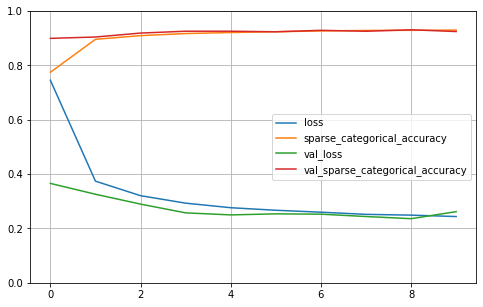

In [ ]:
import pandas as pd

pd.DataFrame(h.history).plot(figsize=(8, 5), ls='-')
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Keras (Functional APIs)

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense

inputs = keras.Input(shape=(28,28,))
x = Flatten()(inputs)
y = Dense(10, activation='relu')(x)
y = Dense(10, activation='relu')(x)
# x = keras.layers.concatenate([y, x])
outputs = Dense(10, activation='sigmoid')(x)

func_model = keras.Model(inputs, outputs)


func_model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

func_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h = func_model.fit(X_train, y_train, batch_size=16, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
3125/3125 [==============================] - 5s 1ms/step - loss: 0.4565 - sparse_categorical_accuracy: 0.8809 - val_loss: 0.2921 - val_sparse_categorical_accuracy: 0.9215
Epoch 2/10
3125/3125 [==============================] - 4s 1ms/step - loss: 0.3045 - sparse_categorical_accuracy: 0.9164 - val_loss: 0.2739 - val_sparse_categorical_accuracy: 0.9240
Epoch 3/10
3125/3125 [==============================] - 4s 1ms/step - loss: 0.2857 - sparse_categorical_accuracy: 0.9214 - val_loss: 0.2639 - val_sparse_categorical_accuracy: 0.9268
Epoch 4/10
3125/3125 [==============================] - 4s 1ms/step - loss: 0.2754 - sparse_categorical_accuracy: 0.9237 - val_loss: 0.2605 - val_sparse_categorical_accuracy: 0.9291
Epoch 5/10
3125/3125 [==============================] - 4s 1ms/step - loss: 0.2692 - sparse_categorical_accuracy: 0.9256 - val_loss: 0.2576 - val_sparse_categorical_accuracy: 0.9323
Epoch 6/10
3125/3125 [==============================] - 4s 1ms/step - loss: 0.2643 - spars

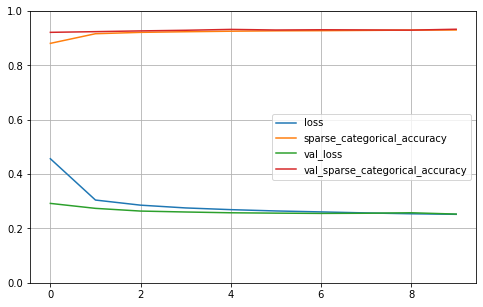

In [ ]:
import pandas as pd

pd.DataFrame(h.history).plot(figsize=(8, 5), ls='-')
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()